### 차원의 저주
- 컬럼이 많으면 문제가 발생하는 것을 차원의 저주
- 컬럼이 많으면 노이즈인 컬럼이 존재할 수 있기 때문에 성능이 떨어질 수 있다.
- 컬럼이 많으면 하나의 좌표평면에 그래프를 그릴 수가 없다.
- 등등..

### 차원 축소
- 차원의 저주를 해결하기 위해 컬럼의 수를 줄이는 작업

### PCA
- 데이터가 투영될 축을 찾을 때 변화량을 기준
- 차원의 수를 줄여서 데이터 패턴을 더욱더 두드러지게 하거나 그래프를 그리기 위한 목적으로 사용한다.
- 데이터를 더 잘 분류하기 위한 목적이라기 보다는 데이터의 패턴을 유지하면서 컬럼수를 줄이는데 목표가 있다.
- 학습 효율이 더 좋아질 가능성이 있다.

In [1]:
# 기본
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 경고 뜨지 않게...
import warnings
warnings.filterwarnings('ignore')

# 그래프 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
# plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['font.size'] = 16
plt.rcParams['figure.figsize'] = 20, 10
plt.rcParams['axes.unicode_minus'] = False

# 데이터 전처리 알고리즘
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

# 학습용과 검증용으로 나누는 함수
from sklearn.model_selection import train_test_split

# 교차검증
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold

# 하이퍼 파라미터 튜닝
from sklearn.model_selection import GridSearchCV

# 분류 알고리즘
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import VotingClassifier

# 회귀 알고리즘
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import VotingRegressor

# 분류용 평가 함수
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

# 회귀용 평가 함수
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

# 차원 축소
from sklearn.decomposition import PCA

In [2]:
# 데이터를 읽어온다.
iris_df = pd.read_csv('data/iris.csv')
iris_df.columns = ['꽃받침길이', '꽃받침너비', '꽃잎길이', '꽃잎너비', '품종']
iris_df

,꽃받침길이,꽃받침너비,꽃잎길이,꽃잎너비,품종
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


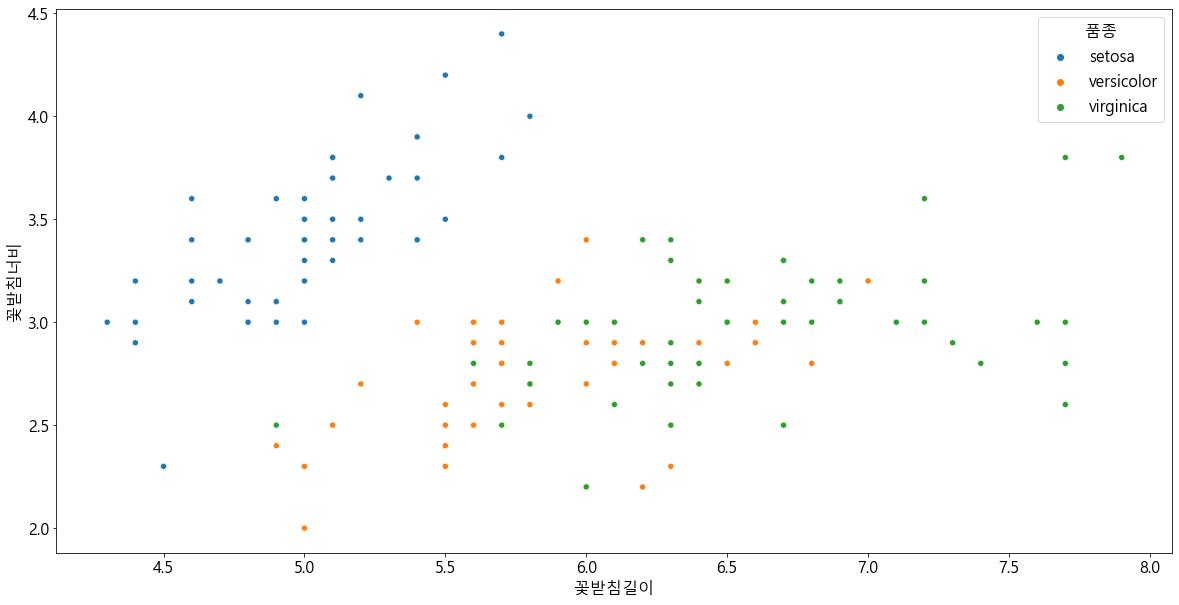

In [3]:
# Scatter : x축과 y축에 컬럼 하나씩 지정하여 점을 찍는다.
# 두 개의 컬럼만 사용할 수 있다.
sns.scatterplot(data=iris_df, x='꽃받침길이', y='꽃받침너비', hue='품종')
plt.show()

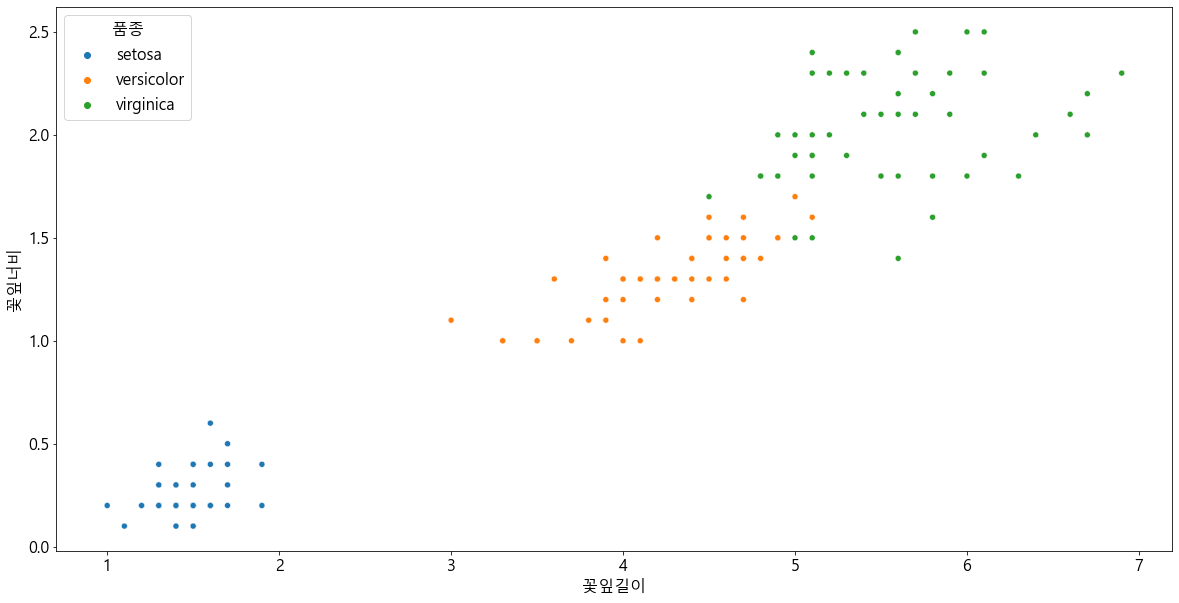

In [4]:
sns.scatterplot(data=iris_df, x='꽃잎길이', y='꽃잎너비', hue='품종')
plt.show()

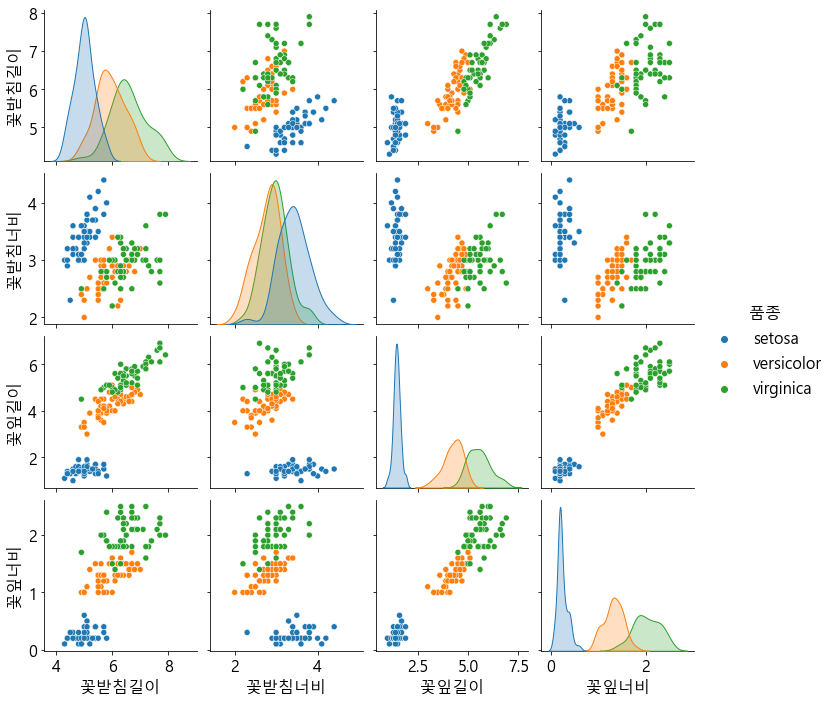

In [5]:
# pairplot : 컬럼들을 1:1 매칭시켜 모든 조합에 대한 scatter를 그려준다.
# 컬럼이 굉장히 많으면 그래프가 굉장히 많이 나온다.
sns.pairplot(data=iris_df, hue='품종')
plt.show()

### PCA 사용
- n_components : 축소된 결과의 컬럼 개수(주 성분의 개수)

In [6]:
pca = PCA(n_components=2)

# 결과데이터를 제거한다.
X = iris_df.drop('품종', axis=1)

# 학습한다.
pca.fit(X)

# 데이터를 변환한다.
r1 = pca.transform(X)
r1

array([[-2.68412563,  0.31939725],
       [-2.71414169, -0.17700123],
       [-2.88899057, -0.14494943],
       [-2.74534286, -0.31829898],
       [-2.72871654,  0.32675451],
       [-2.28085963,  0.74133045],
       [-2.82053775, -0.08946138],
       [-2.62614497,  0.16338496],
       [-2.88638273, -0.57831175],
       [-2.6727558 , -0.11377425],
       [-2.50694709,  0.6450689 ],
       [-2.61275523,  0.01472994],
       [-2.78610927, -0.235112  ],
       [-3.22380374, -0.51139459],
       [-2.64475039,  1.17876464],
       [-2.38603903,  1.33806233],
       [-2.62352788,  0.81067951],
       [-2.64829671,  0.31184914],
       [-2.19982032,  0.87283904],
       [-2.5879864 ,  0.51356031],
       [-2.31025622,  0.39134594],
       [-2.54370523,  0.43299606],
       [-3.21593942,  0.13346807],
       [-2.30273318,  0.09870885],
       [-2.35575405, -0.03728186],
       [-2.50666891, -0.14601688],
       [-2.46882007,  0.13095149],
       [-2.56231991,  0.36771886],
       [-2.63953472,

In [8]:
# 그래프를 그리기 위해 데이터 프레임을 생성한다.
pca_df = pd.DataFrame(r1, columns=['p1', 'p2'])
pca_df['target'] = iris_df['품종']
pca_df

,p1,p2,target
0,-2.684126,0.319397,setosa
1,-2.714142,-0.177001,setosa
2,-2.888991,-0.144949,setosa
3,-2.745343,-0.318299,setosa
4,-2.728717,0.326755,setosa
...,...,...,...
145,1.944110,0.187532,virginica
146,1.527167,-0.375317,virginica
147,1.764346,0.078859,virginica
148,1.900942,0.116628,virginica


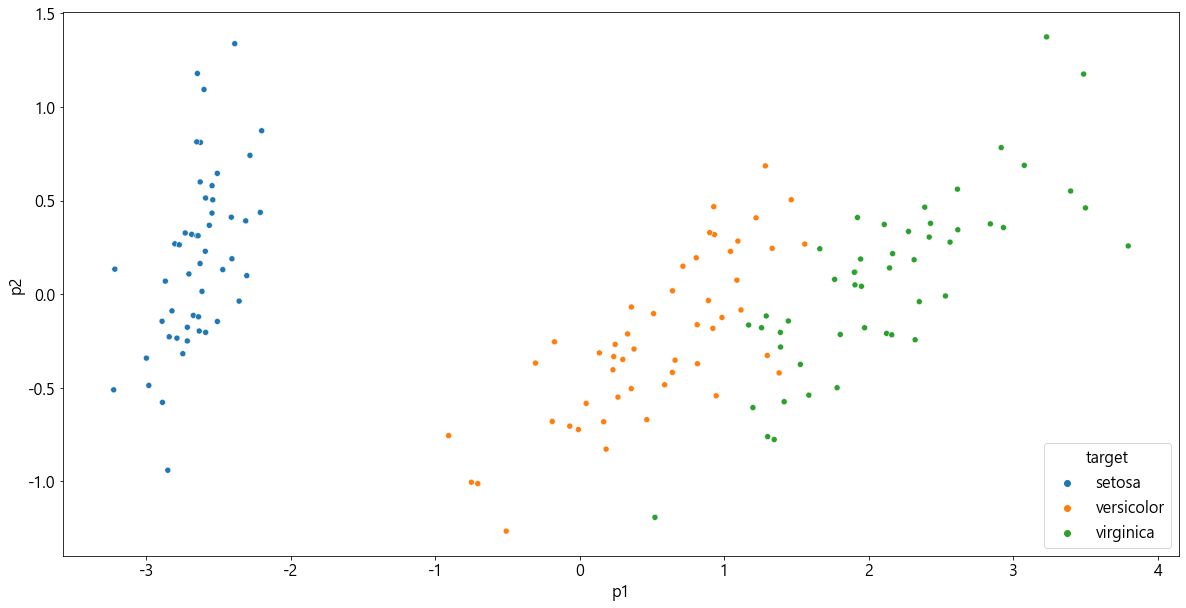

In [9]:
# 산점도를 그린다.
sns.scatterplot(data=pca_df, x='p1', y='p2', hue='target')
plt.show()